<a href="https://colab.research.google.com/github/jinwoo3239/rdkit/blob/main/rdkit_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install DeepChem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 30.7 MB/s 
     |████████████████████████████████| 36.8 MB 38 kB/s 


In [ ]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [ ]:
rdkit.__version__

'2022.03.4'

In [ ]:
m = Chem.MolFromSmiles('Cc1ccccc1')
m

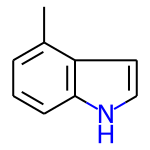

In [ ]:
Chem.Draw.MolToImage(m, size=(150, 150))

In [ ]:
print(Chem.MolToSmiles(m)) # Caconical form
print(Chem.MolToSmiles(m, kekuleSmiles=True)) # Kekular form

Cc1cccc2[nH]ccc12
CC1=CC=CC2=C1C=CN2


In [ ]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/input.mol

--2022-08-07 01:01:33--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/input.mol
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1024 (1.0K) [text/plain]
Saving to: ‘input.mol’

input.mol           100%[===================>]   1.00K  --.-KB/s    in 0s      

2022-08-07 01:01:34 (63.8 MB/s) - ‘input.mol’ saved [1024/1024]



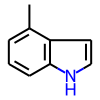

In [ ]:
m = Chem.MolFromMolFile('input.mol')
m
Chem.Draw.MolToImage(m, size=(100, 100))

In [ ]:
type(m)

rdkit.Chem.rdchem.Mol

In [ ]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/5ht3ligs.sdf

--2022-08-07 01:10:16--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/5ht3ligs.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9578 (9.4K) [text/plain]
Saving to: ‘5ht3ligs.sdf’

5ht3ligs.sdf        100%[===================>]   9.35K  --.-KB/s    in 0s      

2022-08-07 01:10:16 (68.5 MB/s) - ‘5ht3ligs.sdf’ saved [9578/9578]



In [ ]:
# $$$$ 로 끊어져서 있음
# sdf 파일은 여러개의 분자 표현식

In [ ]:
suppl = Chem.SDMolSupplier('5ht3ligs.sdf')

mols = []
for mol in suppl:
    mols.append(mol)
    print(mol.GetNumAtoms())

20
24
24
26


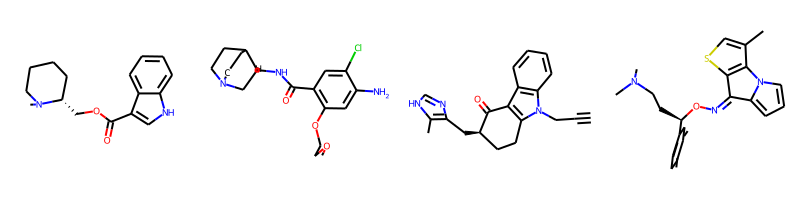

In [ ]:
# 3차원 구조를 2차원 구조로 표현하다가 보니까, 링이 찌그러져 있는 것 처럼 보인다
Chem.Draw.MolsToGridImage(mols, molsPerRow=4)

In [ ]:
# Caconical smiles 로 내보니기로 해준다.

In [ ]:
Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1'))

'c1ccncc1'

In [ ]:
Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1'))

'c1ccncc1'

In [ ]:
Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1'))

'c1ccncc1'

In [ ]:
Chem.MolToMolFile(m, "test.mol")

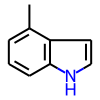

In [ ]:
m_test = Chem.MolFromMolFile('test.mol')
Chem.Draw.MolToImage(m_test, size=(100, 100))

In [ ]:
m_test.SetProp("_Name", 'test_name')
print(Chem.MolToMolBlock(m_test))

test_name
     RDKit          2D

 10 11  0  0  0  0  0  0  0  0999 V2000
   -3.2411   -0.5303    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9555   -0.9428    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9555   -1.7679    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2411   -2.1804    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5266   -1.7679    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5266   -0.9428    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8122   -2.1803    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0977   -0.9428    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0977   -1.7678    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2411    0.2947    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  1  6  1  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  6  8  1  0
  5  6  2  0
  7  5  1  0
  7  9  1  0
  8  9  2  0
  1 10  1  0
M  END



In [ ]:
!wget https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/actives_5ht3.sdf.gz

--2022-08-07 04:56:59--  https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/actives_5ht3.sdf.gz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/actives_5ht3.sdf.gz [following]
--2022-08-07 04:56:59--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/actives_5ht3.sdf.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36077 (35K) [application/octet-stream]
Saving to: ‘actives_5ht3.sdf.gz’

actives_5ht3.sdf.gz 100%[===================>]  35.23K  --.-KB/s    in 0.006s  

2022-08-07 04:56:59 (6.02 MB/s) - ‘actives_5ht3.sdf.gz’ saved [36077/36

In [ ]:
# 분자에 문제가 있으면 none 을 return
import gzip

fp = gzip.open('actives_5ht3.sdf.gz')
suppl = Chem.ForwardSDMolSupplier(fp)

mols = [mol for mol in suppl if mol is not None]
len(mols)

180

In [ ]:
mols[0]

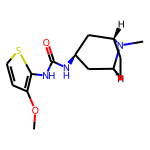

In [ ]:
Chem.Draw.MolToImage(mols[0], size=(150, 150))

In [ ]:
# file 로 저장하기
with Chem.SDWriter('test_mols.sdf') as fout:
    for mol in mols:
        fout.write(mol)

In [ ]:
# 이 분자들은 수소가 보통 없음...
test_suppl = Chem.SDMolSupplier('test_mols.sdf')

# Chem.Draw.MolsToGridImage(test_suppl, molsPerRow=4, )

In [ ]:
# 수소를 붙여보기

# Chem.AddHs function 을 이용함.. 이때 새로운 분자를 return

m1 = test_suppl[0]

In [ ]:
Chem.AddHs(m1)

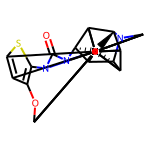

In [ ]:
Chem.Draw.MolToImage(Chem.AddHs(m1), size=(150, 150))
# 단순히 수소를 붙이면, 수소의 좌표가 입력이 되지 않는다

In [ ]:
print(Chem.MolToMolBlock(m1))

tpls\mol-1.tpl
     RDKit          3D

 20 22  0  0  0  0  0  0  0  0999 V2000
    1.1200   -0.6200   -1.0800 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.5400    0.8200   -1.0600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200   -0.6400   -1.3200 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5600   -1.1800    0.3000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1400    1.2200    0.3200 C   0  0  2  0  0  0  0  0  0  0  0  0
    2.9600    1.0600   -1.3800 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2400    0.2400   -0.3000 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.5600    0.0600    1.2400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200    1.4600    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7800   -0.5600    0.7600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6400   -0.1600    1.7400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0600   -1.0400    2.6800 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0200    1.0000    1.7600 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9400 

In [ ]:
# 수소의 좌표가 존재하지 않음

m2 = Chem.AddHs(m1)
print(Chem.MolToMolBlock(m2))

tpls\mol-1.tpl
     RDKit          3D

 41 43  0  0  0  0  0  0  0  0999 V2000
    1.1200   -0.6200   -1.0800 C   0  0  1  0  0  0  0  0  0  0  0  0
    1.5400    0.8200   -1.0600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200   -0.6400   -1.3200 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5600   -1.1800    0.3000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1400    1.2200    0.3200 C   0  0  1  0  0  0  0  0  0  0  0  0
    2.9600    1.0600   -1.3800 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2400    0.2400   -0.3000 C   0  0  1  0  0  0  0  0  0  0  0  0
    1.5600    0.0600    1.2400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200    1.4600    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7800   -0.5600    0.7600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6400   -0.1600    1.7400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0600   -1.0400    2.6800 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0200    1.0000    1.7600 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9400 

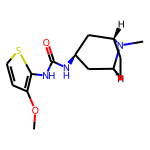

In [ ]:
# 수소를 지울 때에는 Chem.RemoveHs..

m3 = Chem.RemoveHs(m2)
Chem.Draw.MolToImage(m3, size=(150, 150))

In [ ]:
print(Chem.MolToMolBlock(m3))

tpls\mol-1.tpl
     RDKit          3D

 20 22  0  0  0  0  0  0  0  0999 V2000
    1.1200   -0.6200   -1.0800 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.5400    0.8200   -1.0600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200   -0.6400   -1.3200 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5600   -1.1800    0.3000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1400    1.2200    0.3200 C   0  0  2  0  0  0  0  0  0  0  0  0
    2.9600    1.0600   -1.3800 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2400    0.2400   -0.3000 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.5600    0.0600    1.2400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200    1.4600    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7800   -0.5600    0.7600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6400   -0.1600    1.7400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0600   -1.0400    2.6800 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0200    1.0000    1.7600 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9400 

In [ ]:
# 분자의 3차원 구조 만들기
# 분자의 3차원 crystal 구조를 만드는 것은 매우 어려움
# 아주 정확한 3차원 구조를 얻기 위해서는 양자 계산 및 전역 최적화 (Global optimization)
# 회전 가능한 bond 의 수가 많은 수록 기하 급수적으로 늘어나게 됨...
# 3차원 구조를 만들어주는 알고리즘은, 어느 정도의 가정하고 만들게 됨... (정확하지 않음)

# RDkit 에서는 ETKDG
# AllChem.EmbedMolecule
# 입력 받은 변수를 inplace 변화를 일으킴


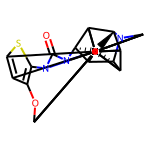

In [ ]:
from rdkit.Chem import AllChem

Chem.Draw.MolToImage(m2, size=(150, 150))

In [ ]:
AllChem.EmbedMolecule(m2) # error 가 생성되지 않으면 0 이 return 

0

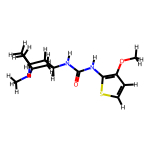

In [ ]:
Chem.Draw.MolToImage(m2, size=(150, 150))

In [ ]:
print(Chem.MolToMolBlock(m2))

tpls\mol-1.tpl
     RDKit          3D

 41 43  0  0  0  0  0  0  0  0999 V2000
   -3.2477    0.0333   -1.6341 C   0  0  2  0  0  0  0  0  0  0  0  0
   -3.5614   -0.6266   -0.3905 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7722    0.3722   -1.6891 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.0795    1.2988   -1.5942 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.4943    0.4722    0.5551 C   0  0  2  0  0  0  0  0  0  0  0  0
   -4.8329   -1.2725   -0.3870 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1730    0.1250   -0.3443 C   0  0  2  0  0  0  0  0  0  0  0  0
   -4.2942    1.5383   -0.1205 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0248    0.8488    0.6808 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1789    0.5563   -0.2038 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.2636   -0.2823    0.1786 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5871    0.1608    0.3115 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.0007   -1.4856    0.4059 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.6165 

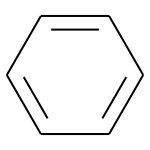

In [ ]:
m = Chem.MolFromSmiles('c1ccccc1')

Chem.Draw.MolToImage(m, size=(150, 150))

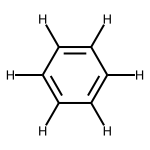

In [ ]:
m_H = Chem.AddHs(m)
Chem.Draw.MolToImage(m_H, size=(150, 150))

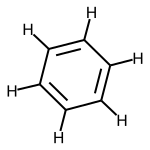

In [ ]:
AllChem.EmbedMolecule(m_H)
Chem.Draw.MolToImage(m_H, size=(150, 150))

In [ ]:
# Fingerprint using RDKits

from rdkit import DataStructs

ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]

fps = [Chem.RDKFingerprint(mol) for mol in ms]

In [ ]:
fps

In [ ]:
# Similarity

DataStructs.FingerprintSimilarity(fps[0], fps[1]) # Taminoto smiliary

0.6

In [ ]:
DataStructs.FingerprintSimilarity(fps[0], fps[1], metric=DataStructs.DiceSimilarity)

0.75

In [ ]:
# MACCSKeys - 166 public keys

from rdkit.Chem import MACCSkeys

fps = [MACCSkeys.GenMACCSKeys(mol) for mol in ms]
fps

In [ ]:
DataStructs.FingerprintSimilarity(fps[0], fps[1])

0.5

In [ ]:
DataStructs.FingerprintSimilarity(fps[0], fps[1], metric=DataStructs.DiceSimilarity)


0.6666666666666666

In [ ]:
# Morgan FingerPrints, 다른 말로 ECFP
# radius 를 확인해봐야함 1 - ECFP2, 2 - ECFP4

from rdkit.Chem import AllChem

fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in ms]
fps

In [ ]:
# 정수 list 가 아니라 bit vector 로 변환하여 보통 사용

fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in ms]
fps

In [ ]:
fps[0]

In [ ]:
len(fps[0])

2048

In [ ]:
DataStructs.FingerprintSimilarity(fps[0], fps[1])
# 특정 분자와 매우 유사한 것들만 고르겠다... 이런 것에 이용 한다

0.2727272727272727

In [ ]:
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

In [ ]:
# !wget https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/actives_5ht3.sdf.gz

In [ ]:
import gzip

fp = gzip.open('actives_5ht3.sdf.gz')
suppl = Chem.ForwardSDMolSupplier(fp)

mols = [mol for mol in suppl if mol is not None]

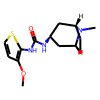

In [ ]:
from rdkit.Chem import Draw

print(mols[0])

Draw.MolToImage(mols[0], size=(100, 100))

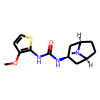

In [ ]:
# 2d cordinate

AllChem.Compute2DCoords(mols[0])
Draw.MolToImage(mols[0], size=(100, 100))

In [ ]:
# 180 개 에서 최대한 다른 10개의 분자를 뽑아 내는 방법

fps = [GetMorganFingerprint(mol, 3) for mol in mols]

In [ ]:
fps[0]

In [ ]:
# define the disfunc

def dist_fun(i, j, fps=fps):
    return 1 - DataStructs.DiceSimilarity(fps[i], fps[j])


picker = MaxMinPicker()
pickIndices = picker.LazyPick(dist_fun, len(fps), 10, seed=100)

In [ ]:
pickIndices

In [ ]:
pick_list = sorted(list(pickIndices))

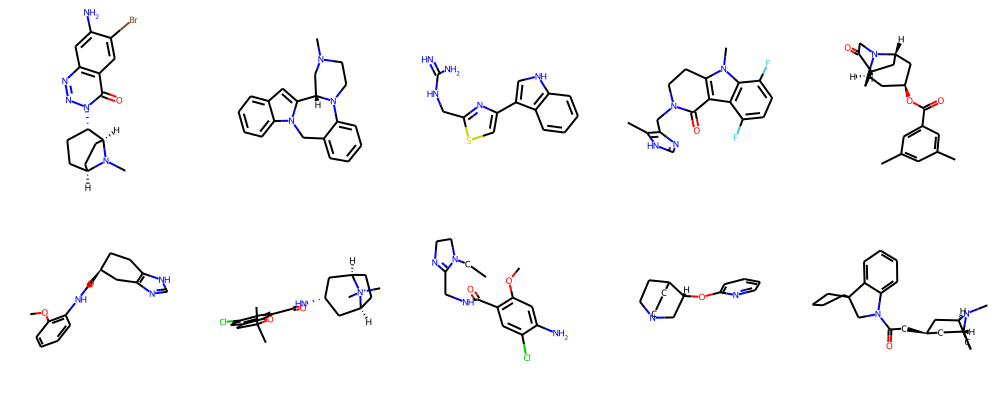

In [ ]:
pick_mol = [mols[i] for i in pick_list]

Draw.MolsToGridImage(pick_mol, molsPerRow=5)

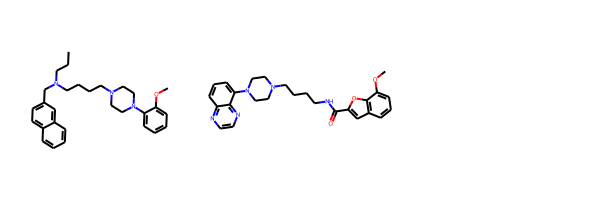

In [ ]:
# Similarity map

mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

Draw.MolsToGridImage([refmol, mol])

In [ ]:
Draw.SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol)

AttributeError: ignored

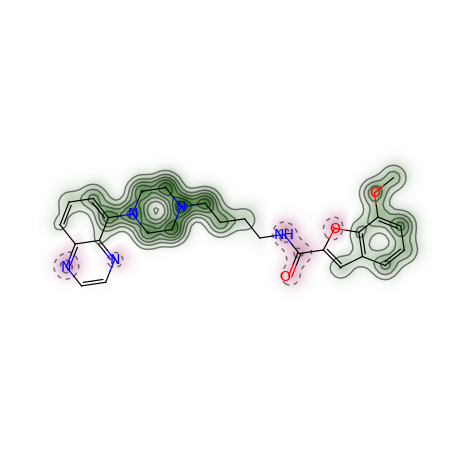

In [ ]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps

fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

In [ ]:
# Descriptor calculation

# 두 군데의 submodule 안에 들어 있음
# rdkit.Chem.Descriptors, rdMolDescriptors
# rdMolDescriptors 안에 더 많은 함수가 들어 있음

In [2]:
from rdkit.Chem import Descriptors, rdMolDescriptors

In [3]:
mol_nH = Chem.MolFromSmiles('CC')
mol_H = Chem.AddHs(mol_nH)

Draw.MolsToGridImage([mol_nH, mol_H])

NameError: ignored

In [4]:
print(Descriptors.MolWt(mol_nH))
print(Descriptors.MolWt(mol_H))

print(Descriptors.ExactMolWt(mol_nH))
print(Descriptors.ExactMolWt(mol_H))

NameError: ignored

In [ ]:
print(rdMolDescriptors.CalcExactMolWt(mol_nH))
print(rdMolDescriptors.CalcExactMolWt(mol_H))

30.046950192
30.046950191999997


In [ ]:
Descriptors.qed(mol_nH)

# QED 얼마나 기존의 약과 유사한 물성을 가지는가 8가지의 특성
# https://www.nature.com/articles/nchem.1243
# 0 ~ 1 사이로 나타남, 0은 상당히 약과 다름... 1에 가까우면 기존의 알려진 약과 유사한 물성을 가짐

0.3727855551576051

In [ ]:
# 3차원 구조 생성

In [5]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, AllChem

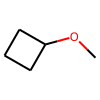

In [6]:
m = 'C1CCC1OC'
m = Chem.MolFromSmiles(m)
Draw.MolToImage(m, size=(100, 100))

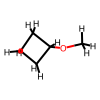

In [7]:
m_H = Chem.AddHs(m)
AllChem.EmbedMolecule(m_H) # 매우 근사적인 구조

Draw.MolToImage(m_H, size=(100, 100))

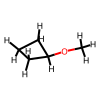

In [8]:
# 좀 더 최적화 된 function (양자역학적 계산은 X)
m_H = Chem.AddHs(m)
AllChem.EmbedMolecule(m_H) # 매우 근사적인 구조
AllChem.MMFFOptimizeMolecule(m_H)
Draw.MolToImage(m_H, size=(100, 100))


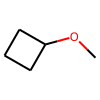

In [9]:
# 다양한 conformational isomer 형성하기

m = 'C1CCC1OC'
m = Chem.MolFromSmiles(m)
Draw.MolToImage(m, size=(100, 100))

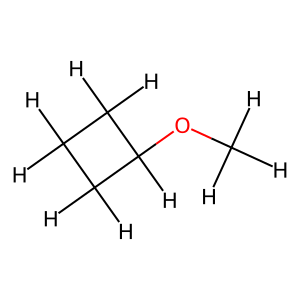

In [10]:
m_H = Chem.AddHs(m)
Draw.MolToImage(m_H)

In [11]:
AllChem.EmbedMultipleConfs(m_H, 10)

In [12]:
print(Chem.MolToMolBlock(m_H, confId=0))


     RDKit          3D

 16 16  0  0  0  0  0  0  0  0999 V2000
   -0.8468   -0.5165   -0.8571 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9491    0.0908    0.0173 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8667    1.0347    0.5557 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1337   -0.0368    0.2219 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3001    0.3501   -0.3643 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.3484   -0.2870    0.2983 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8317   -1.6207   -0.8591 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7202   -0.0077   -1.8166 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.7510    0.5775   -0.5381 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2479   -0.6520    0.7914 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7718    1.9800    0.0101 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0497    1.1906    1.6379 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.2521   -0.7307    1.0478 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.3335    0.0023   -0

In [13]:
print(Chem.MolToMolBlock(m_H, confId=1))


     RDKit          3D

 16 16  0  0  0  0  0  0  0  0999 V2000
   -0.8553    1.0728    0.1056 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9396    0.0222   -0.0778 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9793   -0.9357    0.6461 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1411   -0.0718    0.1043 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1618    0.1904    0.9979 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.4268   -0.0162    0.4689 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9385    1.5165    1.1343 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7535    1.7966   -0.7112 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8354    0.2825    0.5091 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0991   -0.2996   -1.1179 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1097   -0.8805    1.7457 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9963   -1.9549    0.2127 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.4351   -0.4065   -0.9014 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.1529    0.2267    1

In [14]:
# conformational isomer 구조의 차이
rmslist = []
AllChem.AlignMolConformers(m_H, RMSlist=rmslist)

rmslist

[0.6692887585152989,
 1.0081688745922002,
 0.918542555598729,
 1.2833498181215108,
 1.1377799205521424,
 1.3578283763324632,
 1.5608728079042353,
 1.2768911248534551,
 1.2129135750883848]

In [15]:
AllChem.GetConformerRMS(m_H, 0, 1)

0.669288758515298

In [16]:
# 분자 구조식 그리기

In [17]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/cdk2.sdf

--2022-08-10 11:46:48--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/cdk2.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160134 (156K) [text/plain]
Saving to: ‘cdk2.sdf’

cdk2.sdf            100%[===================>] 156.38K  --.-KB/s    in 0.003s  

2022-08-10 11:46:49 (51.0 MB/s) - ‘cdk2.sdf’ saved [160134/160134]



In [18]:
suppl = Chem.SDMolSupplier('cdk2.sdf')
mols = [mol for mol in suppl if mol is not None]
len(mols)

for mol in mols:
    AllChem.Compute2DCoords(mol)

In [19]:
Draw.MolToFile(mols[0], 'test_mol_save.png')

In [20]:
img = Draw.MolsToGridImage(mols[:8], molsPerRow=4, subImgSize=(200, 200),
                           legends=[mol.GetProp("_Name") for mol in mols[:8]], )

In [21]:
img.save('a.png')

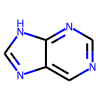

In [22]:
# 공통된 구조를 이용하여 정렬하기

p = Chem.MolFromSmiles('[nH]1cnc2cncnc21')
AllChem.Compute2DCoords(p)

Draw.MolToImage(p, size=(100, 100))

In [23]:
# 특정 core 구조를 가지는 분자만 선택

subms = [mol for mol in mols if mol.HasSubstructMatch(p)]
subms

In [24]:
for mol in subms:
    _ = AllChem.GenerateDepictionMatching2DStructure(mol, p)

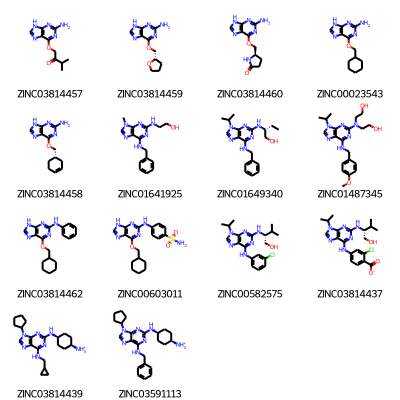

In [25]:
img = Draw.MolsToGridImage(subms, molsPerRow=4, subImgSize=(100, 100),
                           legends=[mol.GetProp('_Name') for mol in subms])

img

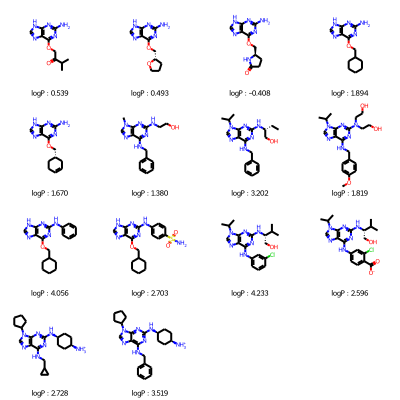

In [29]:
# 밑에 다르게 표기하고 싶을 때...

for mol in subms:
    logp = Chem.Descriptors.MolLogP(mol)
    mol.SetProp("LogP", f'logP : {logp:.3f}') # property 를 넣을 때에는 string 으로 넣어야 한다

img = Chem.Draw.MolsToGridImage(subms, molsPerRow=4, subImgSize=(100, 100),
                                legends=[mol.GetProp('LogP') for mol in subms])
img

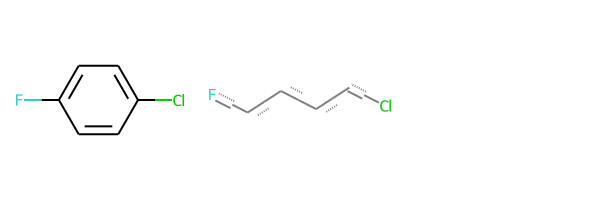

In [31]:
# 특정 구조에 highlight 주기

smi = 'c1cc(F)ccc1Cl'
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('ClccccF')

Chem.Draw.MolsToGridImage([mol, patt])

In [32]:
hit_ats = list(mol.GetSubstructMatch(patt))
hit_ats

[7, 6, 5, 4, 2, 3]

In [37]:
# bond 를 찾는 법

hit_bonds = []

for bond in patt.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(mol.GetBondBetweenAtoms(aid1, aid2).GetIdx())


In [38]:
hit_bonds

[6, 5, 4, 3, 2]

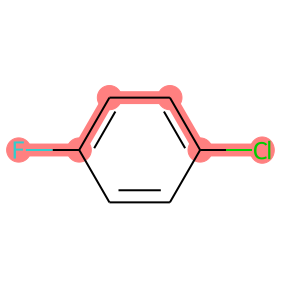

In [42]:
Chem.Draw.MolToImage(mol, highlightAtoms=hit_ats, highlightBonds=hit_bonds)

In [44]:
from rdkit.Chem.Draw import rdMolDraw2D

d = rdMolDraw2D.MolDraw2DSVG(500, 500) # svg 로 저장하겠다
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats, highlightBonds=hit_bonds)
d.FinishDrawing()

In [45]:
d

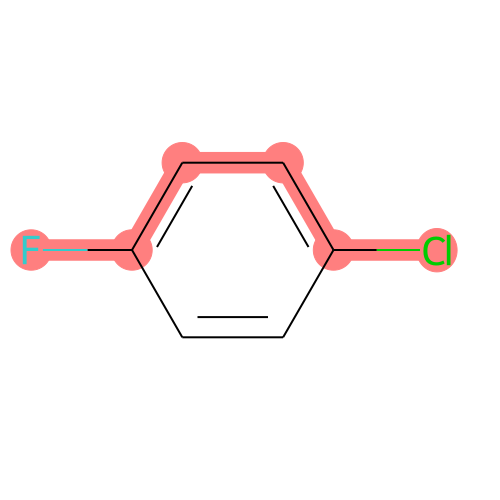

In [47]:
from IPython.display import SVG

SVG(d.GetDrawingText())

In [48]:
# save
with open('a.svg', 'w') as fp:
    fp.write(d.GetDrawingText())

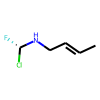

In [50]:
# 원자 결합에 주석을 달기

mol = Chem.MolFromSmiles('Cl[C@H](F)NC\C=C\C')
Draw.MolToImage(mol, size=(100, 100))

In [57]:
d = Chem.Draw.rdMolDraw2D.MolDraw2DCairo(200, 200)
mol.GetAtomWithIdx(2).SetProp('atomNote', 'foo')
mol.GetAtomWithIdx(0).SetProp('atomNote', 'bar')
d.drawOptions().addStereoAnnotation = True
d.drawOptions().addAtomIndices = True
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('b.png')

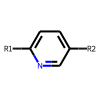

In [58]:
# atom 에 label 하는 방법

smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|' # extened smiles grammer
mol = Chem.MolFromSmiles(smi)

Draw.MolToImage(mol, size=(100, 100))

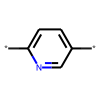

In [60]:
smi = 'c1nc(*)ccc1*' # extened smiles grammer
mol = Chem.MolFromSmiles(smi)
Draw.MolToImage(mol, size=(100, 100))

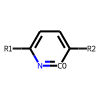

In [61]:
# atom 에 label 하는 방법

smi = 'c1nc(*)ccc1* |$C0;;;R1;;;;R2$|' # extened smiles grammer
mol = Chem.MolFromSmiles(smi)

Draw.MolToImage(mol, size=(100, 100))

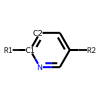

In [63]:
# label method 2

smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|' # extened smiles grammer
mol = Chem.MolFromSmiles(smi)

mol.GetAtomWithIdx(2).SetProp('atomLabel', 'C1')
mol.GetAtomWithIdx(4).SetProp('atomLabel', 'C2')

Draw.MolToImage(mol, size=(100, 100))

In [64]:
d = Chem.Draw.rdMolDraw2D.MolDraw2DCairo(200, 200)
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('c.png')

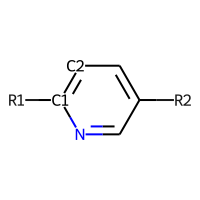

In [66]:
from IPython.display import Image
Image(d.GetDrawingText())

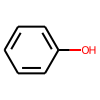

In [67]:
# Substructure searching

m = Chem.MolFromSmiles('c1ccccc1O')
Chem.Draw.MolToImage(m, size=(100, 100))

In [79]:
patt = Chem.MolFromSmarts('ccO')

In [80]:
m.HasSubstructMatch(patt)

True

In [81]:
m.GetSubstructMatch(patt)

(0, 5, 6)

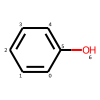

In [82]:
# pattern 에 해당하는 atom 을 확인해보자

for atom in m.GetAtoms():
    i = atom.GetIdx()
    atom.SetProp('atomNote', str(i))

Chem.Draw.MolToImage(m, size=(100, 100))

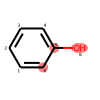

In [94]:
hit_atoms = m.GetSubstructMatch(patt)

Chem.Draw.MolToImage(m, size=(100, 100), highlightAtoms=hit_atoms)

In [95]:
!wget https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/actives_5ht3.sdf.gz

--2022-08-10 13:59:02--  https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/actives_5ht3.sdf.gz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/actives_5ht3.sdf.gz [following]
--2022-08-10 13:59:03--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/actives_5ht3.sdf.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36077 (35K) [application/octet-stream]
Saving to: ‘actives_5ht3.sdf.gz’

actives_5ht3.sdf.gz 100%[===================>]  35.23K  --.-KB/s    in 0s      

2022-08-10 13:59:03 (78.0 MB/s) - ‘actives_5ht3.sdf.gz’ saved [36077/36

In [101]:
patt = Chem.MolFromSmarts('c[NH1]') # aromatic carbon 에 수소 하나 붙은 것
matches = []

# fp = Chem.SDMolSupplier('actives_5ht3.sdf')
import gzip

fp = gzip.open('actives_5ht3.sdf.gz')
suppl = Chem.ForwardSDMolSupplier(fp)

i = 0
for mol in suppl:
    i += 1
    if mol.HasSubstructMatch(patt):
        matches.append(mol)
        

print(i)
print(len(matches))

180
22


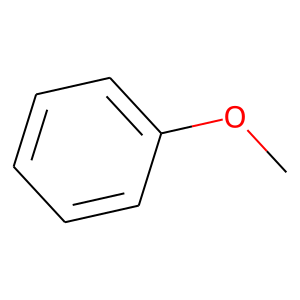

In [102]:
mol = Chem.MolFromSmiles('c1ccccc1OC')
Chem.Draw.MolToImage(mol)

In [103]:
mol.HasSubstructMatch(Chem.MolFromSmiles('COC'))

True

In [105]:
mol.HasSubstructMatch(Chem.MolFromSmarts('COC'))

False

In [106]:
mol.HasSubstructMatch(Chem.MolFromSmarts('cOC'))

True

In [ ]:
# 일반적으로 substructrue에서는 chiraity 를 고려하지 않는다

m = Chem.MolFromSmiles()